# Surface Area of Revolution

---

## What is this?

This notebook demonstrates how to calculate the **Surface Area**  
when rotating a curve about an axis.

---

## Core idea

- Unlike volume, surface area sums up the lengths of infinitesimal bands.
- The general formula (rotating about x-axis) is:
$
S = 2\pi \int_{a}^{b} f(x) \sqrt{1 + [f'(x)]^2} dx
$

---

##  What we’ll do

 1. Define a function and its derivative  
 2. Use **`sympy`** to get the exact integral  
 3. Use **`scipy`** to compute numerically  
 4. Use **`matplotlib`** to visualize the generated surface

---

##  Goal

> Understand how local arc length builds total surface area.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad

In [2]:
x = sp.Symbol('x')
f = x**2
f_prime = sp.diff(f, x)

In [3]:
arc_length_element = sp.sqrt(1 + f_prime**2)
surface_integral = 2 * sp.pi * sp.integrate(f * arc_length_element, (x, 0, 1))
print("Surface Area (symbolic):", surface_integral)

Surface Area (symbolic): 2*pi*(-asinh(2)/64 + 9*sqrt(5)/32)


In [4]:
arc_length_numeric = sp.lambdify(x, f * arc_length_element, 'numpy')
result, _ = quad(lambda x: 2 * np.pi * arc_length_numeric(x), 0, 1)
print("Surface Area (numeric):", result)

Surface Area (numeric): 3.8097297048578036


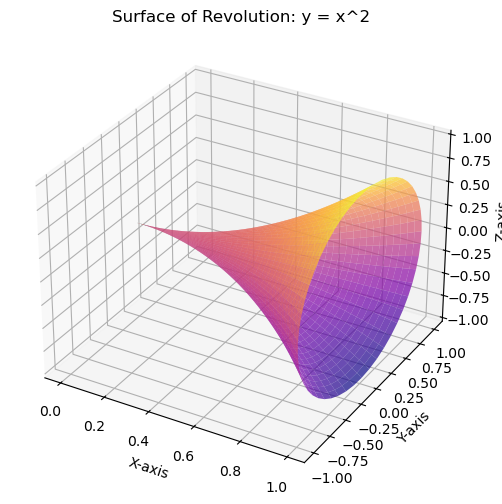

In [5]:
x_vals = np.linspace(0, 1, 50)
theta = np.linspace(0, 2*np.pi, 50)
X, Theta = np.meshgrid(x_vals, theta)

R = X**2

Y = R * np.cos(Theta)
Z = R * np.sin(Theta)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.7)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Surface of Revolution: y = x^2')

plt.show()

# Interpretation – Surface Area of a Solid of Revolution

## What does this figure show?

This figure illustrates the **surface area** generated by revolving a curve around an axis.
In this example, the curve is $y = x$ on the interval $x \in [0, 1]$,
rotated 360° around the chosen axis (typically the x-axis or y-axis).

The surface you see is the sum of all infinitely thin slices of the curve swept around the axis.

---

## How is surface area calculated?

The surface area for rotating $y = f(x)$ about the x-axis is given by:

$
S = 2\pi \int_{a}^{b} f(x) \sqrt{1 + [f'(x)]^2} \,dx
$

- $f(x)$ determines the **radius** of rotation at each x.
- The term  $\sqrt{1 + [f'(x)]^2} $ accounts for the **slant length** of the curve, 
  correcting for how steep or flat it is.
- Integrating this over the interval sums up all those tiny “bands” of surface area.

---

##  Geometric intuition

- Each tiny piece is like a thin ribbon wrapped around the axis.
- These ribbons together form the smooth curved shell you see.
- Unlike volume, you are adding up the **outer skin**, not filling up the whole solid.

---

##  Key takeaway

> Visualizing the surface area as a revolution clarifies that you’re summing
> infinitely many narrow bands to get the total “skin” of the shape.
> This deepens your understanding of how the formula connects local slope,
> rotation radius, and the full surface.

---

**Remember**: 

Disc/Washer → Volume.  
Shell → Volume (alternative).  
Surface Area → Skin only!

